In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

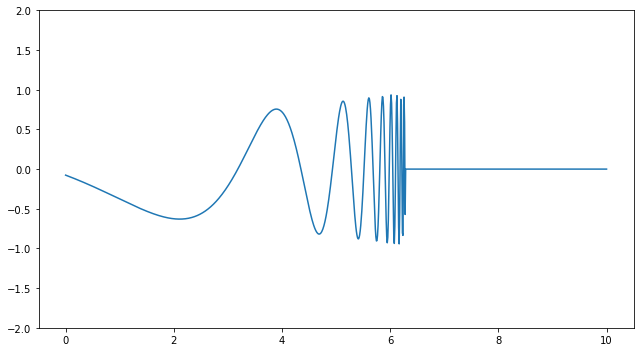

In [7]:
def signal(t):
    # Just a function I made to create a signal that looks sort of
    # like the gravitational wave signal from colliding black holes,
    # purely on a visual basis, not actual physics.
    dt = 0.4
    t0 = 2*np.pi+dt
    return np.where(t < (t0 - dt), np.exp(-0.1*(t0-t))*np.sin(7*np.pi/(t0 - t)), 0.0)

fig = plt.figure(figsize = (9, 5))
t = np.linspace(0, 10, 1000)
plt.plot(t, signal(t))
plt.ylim(-2, 2)
plt.tight_layout()

In [2]:
def convolute(noisysignal, template):
    # Calculating the convolution integral of the noisy signal
    # and the template, using different offsets, i.
    # See for example:
    # https://en.wikipedia.org/wiki/Convolution#Definition
    # This function assumes len(noisysignal) > len(template)
    Ns = len(noisysignal)
    Nt = len(template)
    N  = Ns - Nt
    c  = np.zeros(N)
    for i in range(N):
        c[i] = np.sum(noisysignal[i:i+N]*template)
    return c

In [10]:
N = 50000
t = np.linspace(0, 10, N)
# Calculate the signal, to be used as a template.
template = signal(t)
# Create noise+signal (what you would measure in an actual
# experiment). Creating an array of noise that's twice as
# long as the signal.
noise       = np.random.normal(loc = 0, scale = 3, size = 2*N)
noisysignal = noise
# Adding the signal at a random location in the timeseries of noise:
r = np.random.randint(0, N)
noisysignal[r:r+N] += template

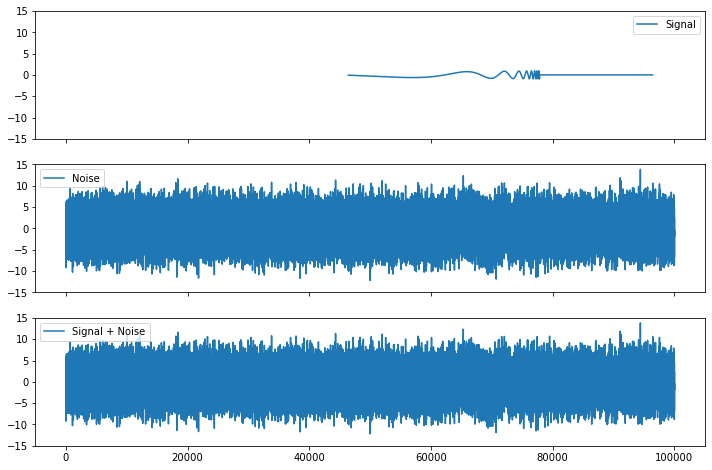

In [11]:
# Create a plot with three subplots to show
# signal, noise and signal + noise
fig, ax = plt.subplots(3, sharex = True, figsize = (12, 8))
ax[0].plot(range(r, r+N), template, label = 'Signal')
ax[1].plot(range(2*N), noise, label = 'Noise')
ax[2].plot(range(2*N), noisysignal, label = 'Signal + Noise')
# Setting same y-limits and adding legend to each subplot.
for a in ax:
    a.legend()
    a.set_ylim(-15, 15)


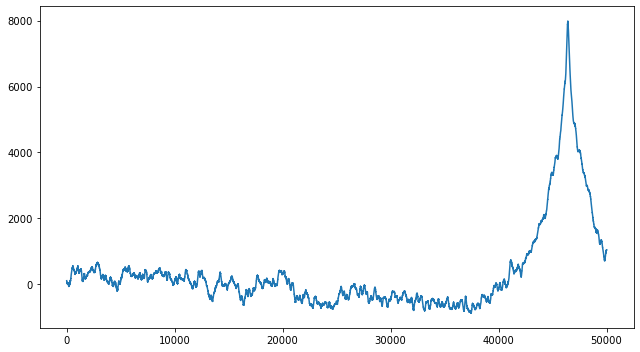

In [12]:
# Calculate and plot convolution
fig = plt.figure(figsize = (9, 5))
c = convolute(noisysignal, template)
plt.plot(c)
plt.tight_layout()